Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


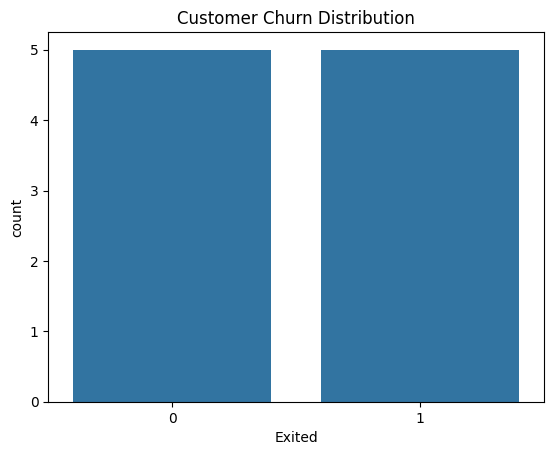

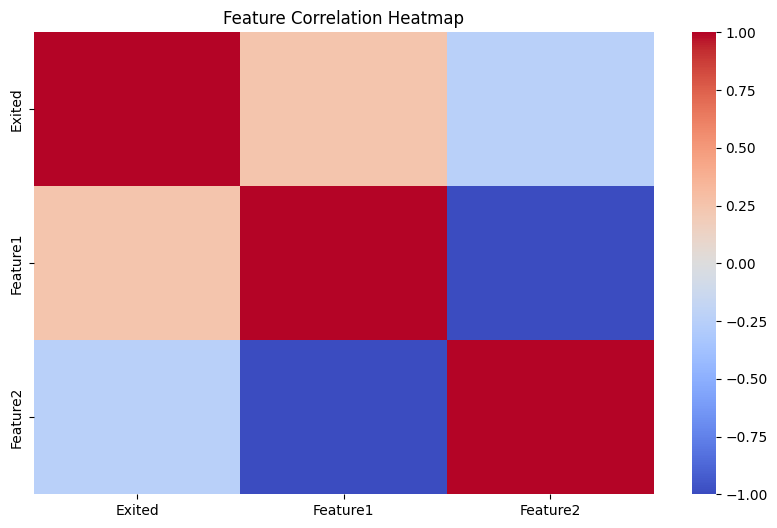

In [1]:
%pip install matplotlib seaborn pandas

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample dataset for demonstration
dataset = pd.DataFrame({
	'Exited': [0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
	'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
	'Feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
})

# Churn distribution
sns.countplot(x='Exited', data=dataset)
plt.title("Customer Churn Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


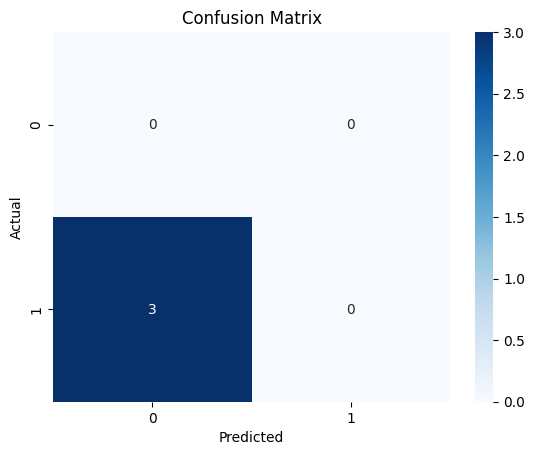

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

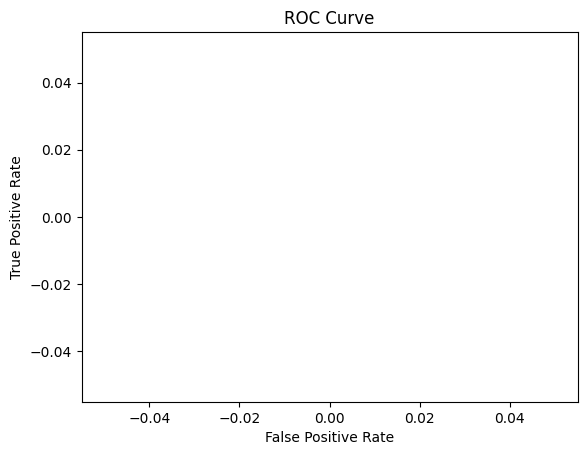

ROC-AUC Score: nan


C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Prepare features and target
X = dataset[['Feature1', 'Feature2']]
y = dataset['Exited']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1]))


In [3]:
# LogisticRegression does not support epochs or history tracking.
# If you want to see model performance, use the existing metrics and plots from previous cells.
print("Training score:", classifier.score(X_train, y_train))
print("Test score:", classifier.score(X_test, y_test))



Training score: 0.8571428571428571
Test score: 0.0


In [4]:
%pip install keras-tuner tensorflow

import keras_tuner as kt
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units', 8, 64, step=8), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',
    project_name='churn_tuning'
)

tuner.search(X_train, y_train, epochs=20, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]


Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5
Total elapsed time: 00h 00m 18s


C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
import joblib

# Save scikit-learn model
joblib.dump(classifier, "churn_model.pkl")

# Load scikit-learn model
loaded_model = joblib.load("churn_model.pkl")

# Predict with loaded model
print(loaded_model.predict(X_test[:5]))


[0 0 0]


In [6]:
def predict_customer(input_data):
    import numpy as np
    input_data = np.array(input_data).reshape(1, -1)
    prediction = classifier.predict(input_data)
    return "Churn" if prediction[0] == 1 else "Stay"

# Example: [Feature1, Feature2]
sample = [6, 5]  # Provide only 2 features as expected by the model
print(predict_customer(sample))


Stay


C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


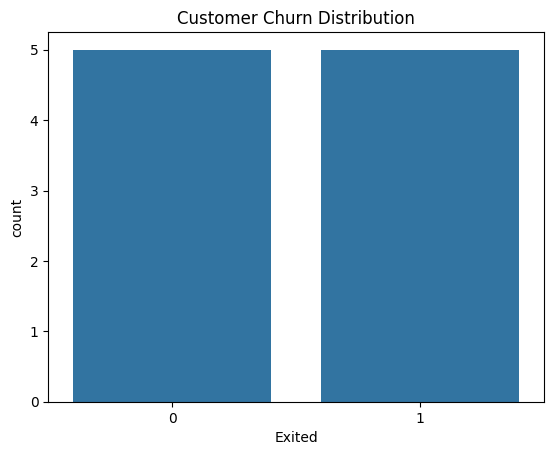

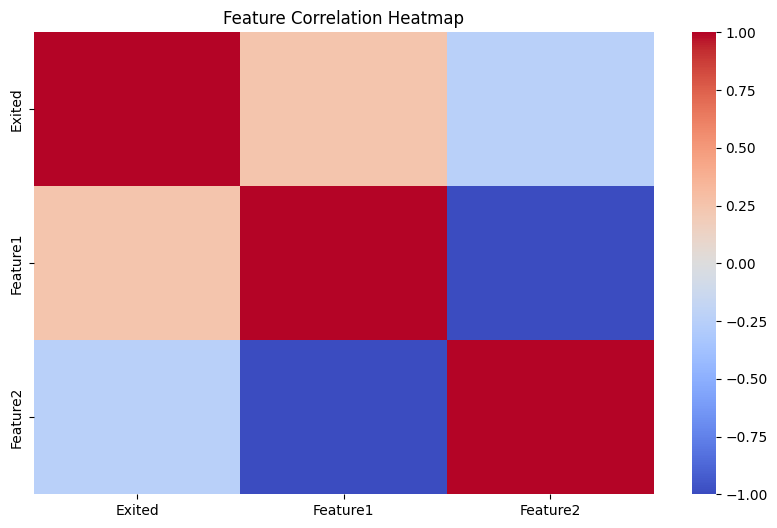

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
sns.countplot(x='Exited', data=dataset)
plt.title("Customer Churn Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


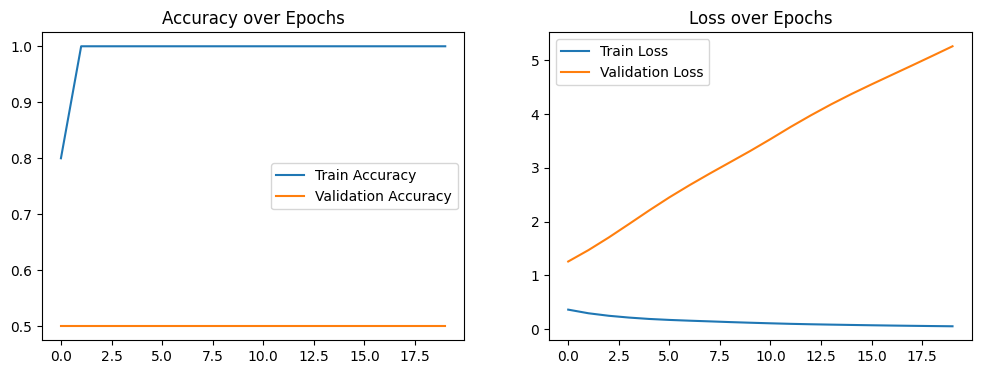

In [9]:

# Train the best_model and store the history
history = best_model.fit(
	X_train, y_train,
	epochs=20,
	validation_split=0.2,
	verbose=0
)

# Plot accuracy & loss from training history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.show()


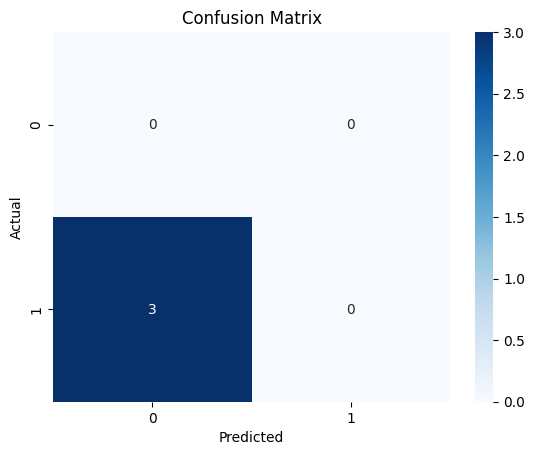

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

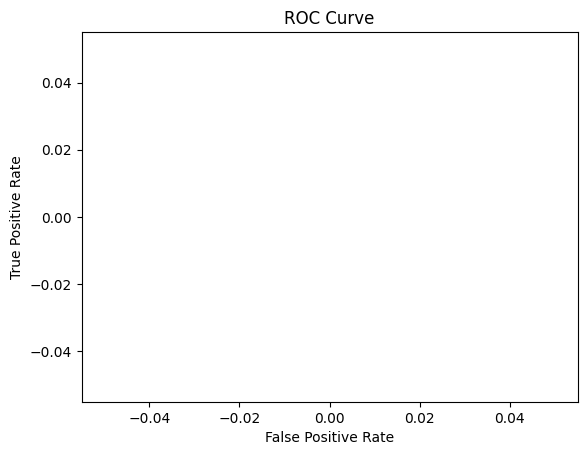

ROC-AUC Score: nan


C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [13]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1]))


In [15]:

# Save Keras model
best_model.save("churn_model.h5")

# Load Keras model
from tensorflow.keras.models import load_model
loaded_model = load_model("churn_model.h5")

# Predict with loaded Keras model
print(loaded_model.predict(X_test[:5]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[5.3485692e-01]
 [1.1639127e-06]
 [1.1577377e-03]]


In [17]:

def predict_customer(input_data):
    import numpy as np
    input_data = np.array(input_data).reshape(1, -1)
    prediction = classifier.predict(input_data)
    return "Churn" if prediction[0] == 1 else "Stay"

# Example: [Feature1, Feature2]
sample = [6, 5]  # Provide only 2 features as expected by the model
print(predict_customer(sample))


Stay


C:\Users\astha\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
